# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in this lab's data folder.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [1]:
# import libraries here
import pandas as pd
import numpy as np

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [4]:
# your code here
temp = pd.read_csv('../data/Temp_States.csv', sep = ';')

#### Print `temp`.

In [7]:
# your code here
temp

,City,State,Temperature,Unnamed: 3
0,NYC,New York,19.444444,NaN
1,Albany,New York,9.444444,NaN
2,Buffalo,New York,3.333333,NaN
3,Hartford,Connecticut,17.222222,NaN
4,Bridgeport,Connecticut,14.444444,NaN
5,Treton,New Jersey,22.222222,NaN
6,Newark,New Jersey,20.000000,NaN


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [31]:
# your code here
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,7.0,15.15873,6.695265,3.333333,11.944444,17.222222,19.722222,22.222222
Unnamed: 3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
"""
your comments here
"""

#### Select the rows where state is New York.

In [8]:
# your code here
mask = temp['State']=='New York'
ny = temp.loc[mask,:]

#### What is the average temperature of cities in New York?

In [9]:
# your code here
ny['Temperature'].mean()

10.740740739000001

#### Which states and cities have a temperature above 15 degrees Celsius?

In [11]:
# your code here
mask = temp['Temperature']>15
above15 = temp.loc[mask,['City', 'State']]
above15

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [12]:
# your code here
above15[['City']]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [13]:
# your code here
mask = (temp['Temperature'] > 15)&(temp['Temperature']<20)
btw1520 = temp.loc[mask,:]
btw1520

,City,State,Temperature,Unnamed: 3
0,NYC,New York,19.444444,NaN
3,Hartford,Connecticut,17.222222,NaN


#### Find the mean and standard deviation of the temperature of each state.

In [16]:
# your code here
temp.groupby(by = 'State', as_index = False)['Temperature'].mean()

,State,Temperature
0,Connecticut,15.833333
1,New Jersey,21.111111
2,New York,10.740741


In [24]:
temp.groupby(by = 'State')['Temperature'].std()

State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64

# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [28]:
# your code here
employees = pd.read_csv('../data/employees.csv', sep = ';')

#### Explore the data types of the `employees` dataframe. Comment your results.

In [30]:
# your code here
employees.describe().T

,count,mean,std,min,25%,50%,75%,max
Years,9.0,4.111111,2.803767,1.0,2.0,3.0,7.0,8.0
Salary,9.0,48.888889,16.541194,30.0,35.0,55.0,60.0,70.0
Unnamed: 7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
"""
your comments here

"""

#### What's the average salary in this company?

In [32]:
# your code here
employees['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [33]:
# your code here
employees['Salary'].max()

70

#### What's the lowest salary?

In [34]:
# your code here
employees['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [36]:
# your code here
mask = employees['Salary'] == employees['Salary'].min()
lowest_salary = employees.loc[mask,['Name', 'Salary']]
lowest_salary

,Name,Salary
1,Maria,30
2,David,30


#### Find all the information about an employee called David.

In [37]:
# your code here
mask = employees['Name'] == 'David'
david = employees.loc[mask,:]
david

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
2,David,HR,Master,M,analyst,2,30,NaN


#### Could you return only David's salary?

In [38]:
# your code here
david.loc[:,['Salary']]

,Salary
2,30


#### Print all the rows where job title is associate.

In [39]:
# your code here
mask = employees['Title'] == 'associate'
associate = employees.loc[mask,:]
associate

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
4,Samuel,Sales,Master,M,associate,3,55,NaN
5,Eva,Sales,Bachelor,F,associate,2,55,NaN
7,Pedro,IT,Phd,M,associate,7,60,NaN


#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [40]:
# Method 1
# your code here
employees.iloc[:3,:]

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
0,Jose,IT,Bachelor,M,analyst,1,35,NaN
1,Maria,IT,Master,F,analyst,2,30,NaN
2,David,HR,Master,M,analyst,2,30,NaN


In [41]:
# Method 2
# your code here
employees.head(3)

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
0,Jose,IT,Bachelor,M,analyst,1,35,NaN
1,Maria,IT,Master,F,analyst,2,30,NaN
2,David,HR,Master,M,analyst,2,30,NaN


#### Find the employees whose title is associate and whose salary is above 55.

In [42]:
# your code here
mask = (employees['Title']=='associate')&(employees['Salary']>55)
ass_55 = employees.loc[mask,:]
ass_55

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
7,Pedro,IT,Phd,M,associate,7,60,NaN


#### Group the employees by number of years of employment. What are the average salaries in each group?

In [44]:
# your code here
employees.groupby(by = 'Years', as_index = False)['Salary'].mean()

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average salary per title?

In [45]:
# your code here
employees.groupby(by = 'Title', as_index = False)['Salary'].mean()

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


####  Find the salary quartiles.


In [50]:
# your code here
employees[['Salary']].describe().T.loc[:,['25%','50%','75%']]

,25%,50%,75%
Salary,35.0,55.0,60.0


#### Is the mean salary different per gender?

In [47]:
# your code here
employees.groupby(by = 'Gender', as_index = False)['Salary'].mean()

,Gender,Salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [51]:
# your code here
employees.describe().T.loc[:,['min','mean','max']]

,min,mean,max
Years,1.0,4.111111,8.0
Salary,30.0,48.888889,70.0
Unnamed: 7,NaN,NaN,NaN


#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [119]:
# your code here
df = employees.groupby(by = 'Department', as_index = False)['Salary'].agg(['min','max'])
df['difference'] = df['max'] - df['min']
df

,min,max,difference
Department,,,
HR,30,70,40
IT,30,70,40
Sales,55,55,0


# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [78]:
# your code here
orders = pd.read_csv('../data/Orders.csv')

In [103]:
orders = orders.iloc[1:,:]

#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [81]:
# your code here
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397923.0,278465.921656,152770.922481,1.0,148334.50,284908.00,410079.50,541908.00
InvoiceNo,397923.0,560617.187592,13106.127774,536365.0,549234.00,561893.00,572090.00,581587.00
year,397923.0,2010.934261,0.247825,2010.0,2011.00,2011.00,2011.00,2011.00
month,397923.0,7.612526,3.416524,1.0,5.00,8.00,11.00,12.00
day,397923.0,3.614556,1.928276,1.0,2.00,3.00,5.00,7.00
hour,397923.0,12.728259,2.273525,6.0,11.00,13.00,14.00,20.00
Quantity,397923.0,13.021841,180.420436,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397923.0,3.116176,22.096816,0.0,1.25,1.95,3.75,8142.75
CustomerID,397923.0,15294.308748,1713.167239,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397923.0,22.394766,309.055977,0.0,4.68,11.80,19.80,168469.60


In [75]:
"""
your comments here
"""

'\nyour comments here\n'

####  What is the average purchase price?

In [82]:
# your code here
orders['amount_spent'].mean()

22.394766334198362

#### What are the highest and lowest purchase prices? 

In [83]:
# your code here
orders[['amount_spent']].describe().T[['min','max']]

,min,max
amount_spent,0.0,168469.6


#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [84]:
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,5,536365,22752,2010,12,3,8,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30


In [90]:
# your code here
mask = orders['Country'] == "Spain"
spain = orders.loc[mask,:]
spain['CustomerID'].unique()

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442], dtype=int64)

#### How many customers do we have in Spain?

In [91]:
# your code here
len(spain['CustomerID'].unique())

30

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [93]:
# your code here
customers = orders.groupby(by = 'CustomerID', as_index = False)[['Quantity']].sum()
mask = customers['Quantity'] > 50
customers.loc[mask,:]

,CustomerID,Quantity
0,12346,74215
1,12347,2458
2,12348,2341
3,12349,631
4,12350,197
...,...,...
4333,18278,66
4335,18281,54
4336,18282,103
4337,18283,1397


#### Select orders from Spain that include more than 50 items.

In [94]:
# your code here
mask = (orders['Quantity']>50)&(orders['Country']=='Spain')
orders.loc[mask,:]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders.

In [95]:
# your code here
mask = orders['UnitPrice'] == 0
orders.loc[mask,:]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [99]:
# your code here
mask = orders['Description'].str.contains('lunch bag')
orders.loc[mask,:]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all `lunch bag` orders made in 2011.

In [100]:
# your code here
mask = (orders['Description'].str.contains('lunch bag'))&(orders['year']==2011)
orders.loc[mask,:]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

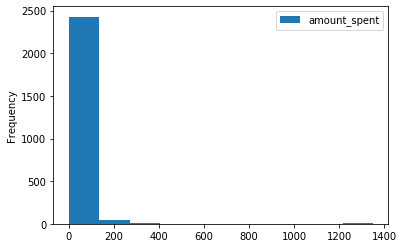

In [117]:
# your code here
mask = orders['Country']=='Spain'
spain_expenses = orders.loc[mask,['amount_spent']]
spain_expenses.plot(kind='hist');

#### Select all orders made in the month of August.

In [102]:
# your code here
mask = orders['month'] == 8
orders.loc[mask,:]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [110]:
# your code here
mask = orders['month'] == 8
orders.loc[mask,:].groupby(by = 'Country').agg(number_of_orders=('InvoiceNo','count'))

,number_of_orders
Country,
Australia,107
Austria,88
Belgium,194
Canada,5
Channel Islands,140
Denmark,16
EIRE,593
Finland,61
France,569


#### What's the  average amount of money spent by country?

In [111]:
# your code here
orders.groupby(by = 'Country').agg({'amount_spent':'mean'})

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [112]:
# your code here
orders.UnitPrice.max()

8142.75

#### What is the average amount spent per year?

In [113]:
# your code here
orders.groupby(by = 'year').amount_spent.mean()

year
2010    21.893044
2011    22.430074
Name: amount_spent, dtype: float64